# EDA_on_Amount_of_Waste_Generated_By_State_32121_0003

In [1]:
# Import required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import lag_plot
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# Read the CSV file into a DataFrame with the correct encoding
df = pd.read_csv("Amount-of Waste-Generated-By-State 32121-0003.csv", encoding="ISO-8859-1")

In [3]:
# Check Number of Rows & Columns present in the DataFrame df. 
df.shape

(1152, 5)

## Data Preprocessing

In [4]:
# Check null values present in the DataFrame df.
df.isnull().sum()

Year                                                       0
States                                                     0
Types of Waste                                             0
Amount of Household Wastes Generated (1000 t)              0
Amount of Household Wastes Generated p. Inhabitant (kg)    0
dtype: int64

In [5]:
# Rename column names for easy understanding.
df = df.rename(columns={ "Amount of Household Wastes Generated (1000 t)":"Total Household Waste Generated (Tons)",
                        "Amount of Household Wastes Generated p. Inhabitant (kg)":"Household Waste Generated per Inhabitant (kg)"})

In [6]:
# Check for zero values in each column.
for col in df.columns:
    zero_values = (df[col] == 0).sum()
    print("Zero values in the column",col," : ", zero_values)

Zero values in the column Year  :  0
Zero values in the column States  :  0
Zero values in the column Types of Waste  :  0
Zero values in the column Total Household Waste Generated (Tons)  :  0
Zero values in the column Household Waste Generated per Inhabitant (kg)  :  30


In [7]:
# Fill the zero values with the mean
mean_value = df[df["Household Waste Generated per Inhabitant (kg)"] != 0]["Household Waste Generated per Inhabitant (kg)"].mean()
df["Household Waste Generated per Inhabitant (kg)"].replace(0, mean_value, inplace=True)

In [8]:
# Check for duplicate values.
df.duplicated().sum()

0

In [9]:
# Check basic statistics of numeric columns.
df.describe()

,Year,Total Household Waste Generated (Tons),Household Waste Generated per Inhabitant (kg)
count,1152.000000,1152.000000,1152.000000
mean,2012.500000,587.807813,115.516043
std,5.190381,757.762553,78.953297
min,2004.000000,0.100000,1.000000
25%,2008.000000,57.000000,38.750000
50%,2012.500000,291.550000,131.000000
75%,2017.000000,775.575000,164.250000
max,2021.000000,4138.600000,369.000000


For the "Total Household Waste Generated (Tons)" column:
- The maximum value (max) is 4138.6, which is notably larger than the 75th percentile (Q3) value of 775.575
This suggests the possibility of outliers  or errors in data collection on the higher end of the distribution.

For the "Household Waste Generated per Inhabitant (kg)" column:
- The minimum value (min) is 1.0, which is significantly lower than the 25th percentile (Q1) value of 38.75
This suggests the possibility of outliers on the lower end of the distribution.
The maximum value (max) is 369.0, which is notably higher than the 75th percentile (Q3) value of 164.25
This also suggests the possibility of outliers  or errors in data collection on the higher end of the distribution.

<AxesSubplot:xlabel='Household Waste Generated per Inhabitant (kg)'>

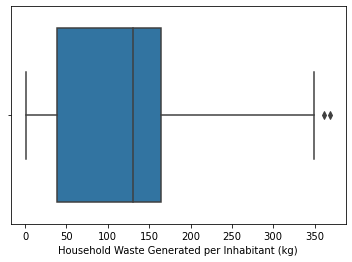

In [10]:
# Use Boxplot to show outliers for 'Household Waste Generated per Inhabitant (kg)'.
sns.boxplot(df['Household Waste Generated per Inhabitant (kg)'])

In [11]:
# Remove the outliers with filtering technique.
# Define the condition for filtering
condition = (df['Household Waste Generated per Inhabitant (kg)'] <= 350)

# Apply the condition to filter the DataFrame
df = df[condition]

<AxesSubplot:xlabel='Total Household Waste Generated (Tons)'>

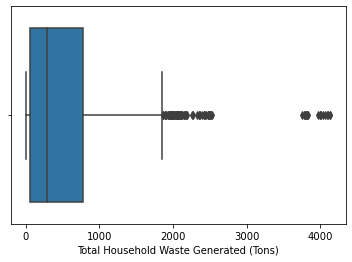

In [12]:
# Use Boxplot to show outliers for 'Total Household Waste Generated (Tons)'.
sns.boxplot(df['Total Household Waste Generated (Tons)'])

In [13]:
# Remove the outliers with filtering technique.
# Define the condition for filtering
condition = (df['Total Household Waste Generated (Tons)'] <= 1800)

# Apply the condition to filter the DataFrame
df = df[condition]

In [14]:
df

,Year,States,Types of Waste,Total Household Waste Generated (Tons),Household Waste Generated per Inhabitant (kg)
0,2004,Baden-Württemberg,Residual household and bulky wastes,1605.6,150.0
1,2004,Baden-Württemberg,Separately collected organic wastes,1220.5,114.0
2,2004,Baden-Württemberg,Separately collected recyclables,1645.3,154.0
3,2004,Baden-Württemberg,Other wastes,9.4,1.0
5,2004,Bayern,Separately collected organic wastes,1677.3,135.0
...,...,...,...,...,...
1147,2021,Schleswig-Holstein,Other wastes,3.6,1.0
1148,2021,Thüringen,Residual household and bulky wastes,400.8,190.0
1149,2021,Thüringen,Separately collected organic wastes,271.2,129.0
1150,2021,Thüringen,Separately collected recyclables,295.0,140.0


# EDA

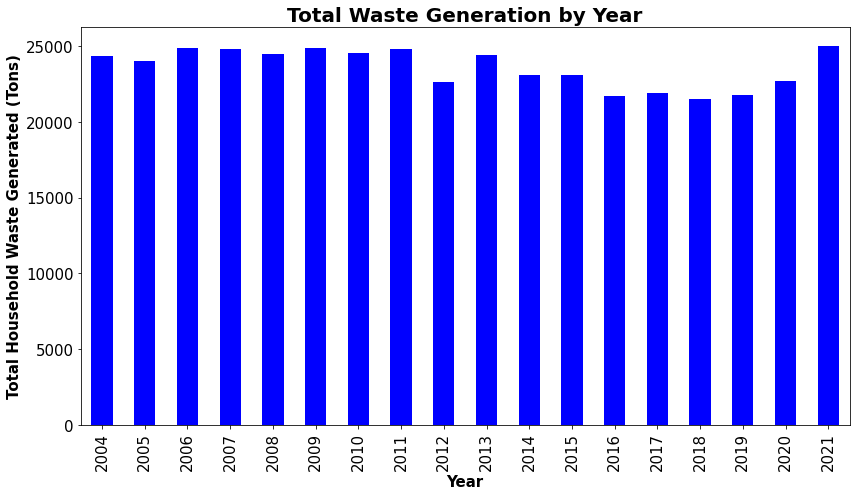

Total Waste Generation by Year :
Year
2004    24370.3
2005    24046.4
2006    24841.4
2007    24828.2
2008    24463.4
2009    24870.4
2010    24530.2
2011    24781.7
2012    22638.1
2013    24425.1
2014    23122.1
2015    23082.8
2016    21708.5
2017    21905.3
2018    21515.2
2019    21737.4
2020    22716.2
2021    24982.3
Name: Total Household Waste Generated (Tons), dtype: float64


In [15]:
# Total Waste Generation by Year
total_waste_by_year = df.groupby('Year')['Total Household Waste Generated (Tons)'].sum()
plt.figure(figsize=(12,7))
total_waste_by_year.plot(kind='bar',color = 'b', fontsize=15)
plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.ylabel('Total Household Waste Generated (Tons)', fontweight='bold', fontsize=15)
plt.title('Total Waste Generation by Year', fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

print("Total Waste Generation by Year :")
print(total_waste_by_year)

**As we can see in the year 2021, Total Waste Generation is highest i.e. 24982.3 (tons).**

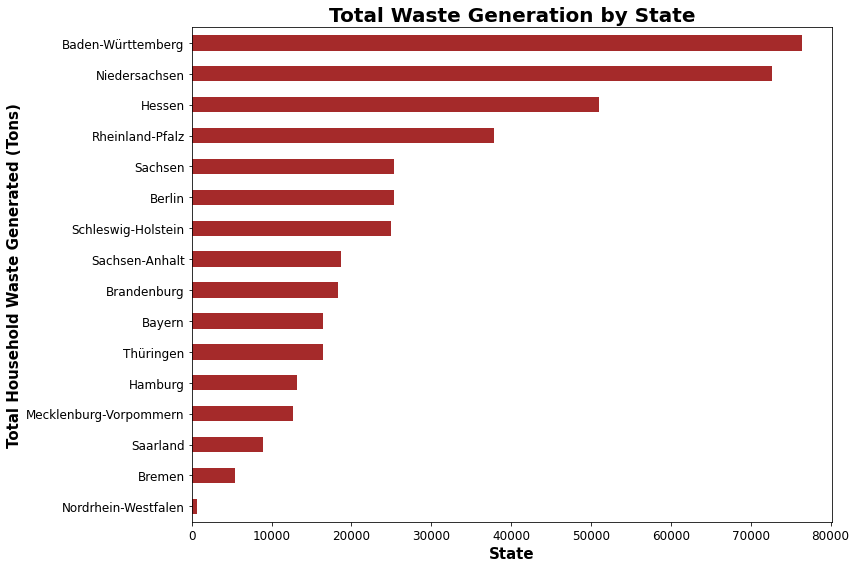

Total Waste Generation by State :
States
Baden-Württemberg         76391.0
Niedersachsen             72715.3
Hessen                    51018.6
Rheinland-Pfalz           37893.0
Sachsen                   25387.0
Berlin                    25374.1
Schleswig-Holstein        24985.1
Sachsen-Anhalt            18745.4
Brandenburg               18358.6
Bayern                    16434.0
Thüringen                 16402.2
Hamburg                   13235.9
Mecklenburg-Vorpommern    12734.1
Saarland                   8915.5
Bremen                     5372.3
Nordrhein-Westfalen         602.9
Name: Total Household Waste Generated (Tons), dtype: float64


In [16]:
# Total Waste Generation by State
total_waste_by_state = df.groupby('States')['Total Household Waste Generated (Tons)'].sum()
total_waste_by_state = total_waste_by_state.sort_values(ascending=True)
plt.figure(figsize=(12,8))
total_waste_by_state.plot(kind='barh', fontsize=12, color='brown')
plt.xlabel('State', fontweight='bold', fontsize=15)
plt.ylabel('Total Household Waste Generated (Tons)', fontweight='bold', fontsize=15)
plt.title('Total Waste Generation by State', fontweight='bold', fontsize=20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Total Waste Generation by State :")
print(total_waste_by_state[::-1])

**'Baden-Württemberg' is generating  highest Waste i.e. 76391.0 (tons).**

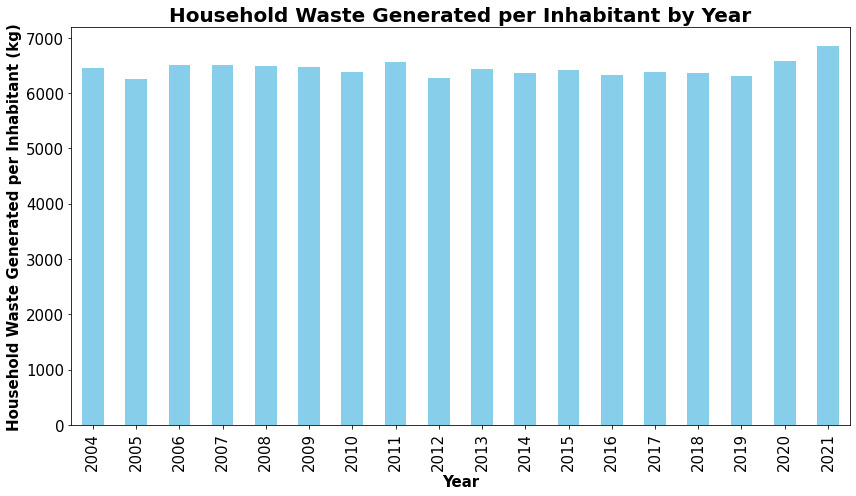

Household Waste Generated per Inhabitant by Year :
Year
2004    6449.548128
2005    6249.032086
2006    6505.516043
2007    6500.516043
2008    6492.032086
2009    6470.516043
2010    6386.516043
2011    6564.516043
2012    6268.516043
2013    6435.516043
2014    6370.516043
2015    6421.032086
2016    6326.032086
2017    6376.032086
2018    6369.548128
2019    6310.032086
2020    6574.032086
2021    6845.032086
Name: Household Waste Generated per Inhabitant (kg), dtype: float64


In [17]:
# Household Waste Generated per Inhabitant by Year
waste_per_inhabitant_by_year = df.groupby('Year')['Household Waste Generated per Inhabitant (kg)'].sum()
plt.figure(figsize=(12,7))
waste_per_inhabitant_by_year.plot(kind='bar', fontsize=15, color='skyblue')
plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.ylabel('Household Waste Generated per Inhabitant (kg)', fontweight='bold', fontsize=15)
plt.title('Household Waste Generated per Inhabitant by Year', fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

print("Household Waste Generated per Inhabitant by Year :", )
print(waste_per_inhabitant_by_year)

**In the year 2021, Household Waste Generated per Inhabitant is highest i.e. 6845.03 (kg).**

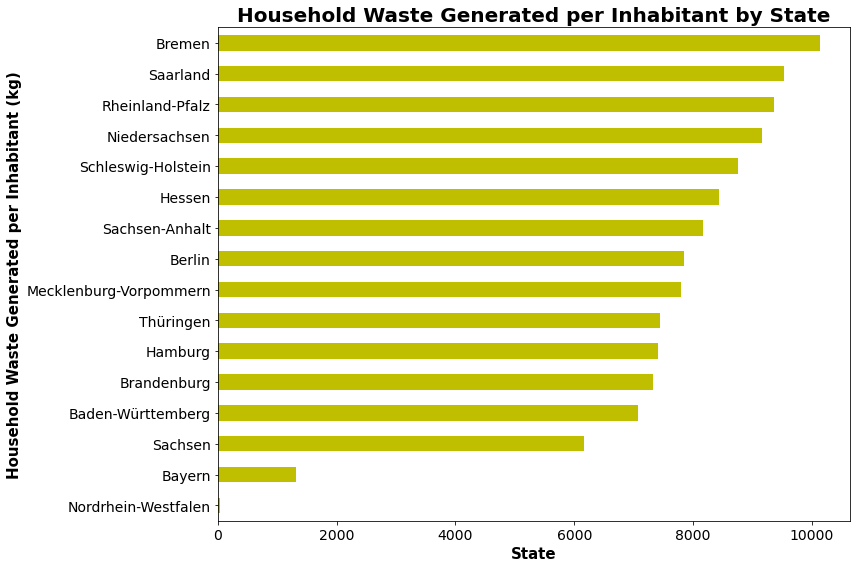

Household Waste Generated per Inhabitant by States :
States
Bremen                    10126.288770
Saarland                   9527.096257
Rheinland-Pfalz            9359.000000
Niedersachsen              9165.000000
Schleswig-Holstein         8755.000000
Hessen                     8435.516043
Sachsen-Anhalt             8158.000000
Berlin                     7852.580214
Mecklenburg-Vorpommern     7798.000000
Thüringen                  7444.000000
Hamburg                    7401.000000
Brandenburg                7320.000000
Baden-Württemberg          7075.000000
Sachsen                    6155.000000
Bayern                     1312.000000
Nordrhein-Westfalen          31.000000
Name: Household Waste Generated per Inhabitant (kg), dtype: float64


In [18]:
#  Household Waste Generated per Inhabitant by State
waste_per_inhabitant_by_state = df.groupby('States')['Household Waste Generated per Inhabitant (kg)'].sum()
waste_per_inhabitant_by_state= waste_per_inhabitant_by_state.sort_values(ascending=True)
plt.figure(figsize=(12,8))
waste_per_inhabitant_by_state.plot(kind='barh', fontsize=14, color='y')
plt.xlabel('State', fontweight='bold', fontsize=15)
plt.ylabel('Household Waste Generated per Inhabitant (kg)', fontweight='bold', fontsize=15)
plt.title('Household Waste Generated per Inhabitant by State', fontweight='bold', fontsize=20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Household Waste Generated per Inhabitant by States :")
print(waste_per_inhabitant_by_state[::-1])

**Bremen' is generating  highest Waste per Inhabitant i.e. 10126.28 (kg)**

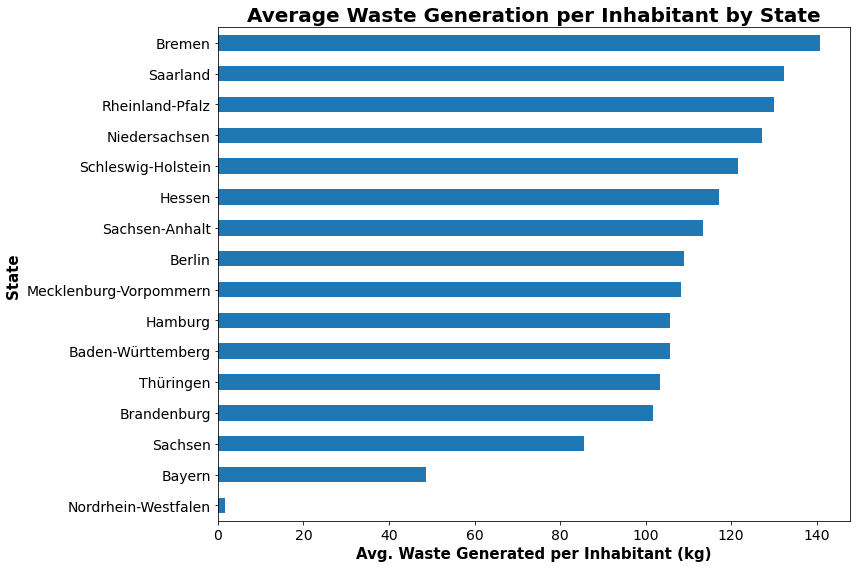

Average Waste Generation per Inhabitant by State :
States
Bremen                    140.642900
Saarland                  132.320781
Rheinland-Pfalz           129.986111
Niedersachsen             127.291667
Schleswig-Holstein        121.597222
Hessen                    117.159945
Sachsen-Anhalt            113.305556
Berlin                    109.063614
Mecklenburg-Vorpommern    108.305556
Hamburg                   105.728571
Baden-Württemberg         105.597015
Thüringen                 103.388889
Brandenburg               101.666667
Sachsen                    85.486111
Bayern                     48.592593
Nordrhein-Westfalen         1.722222
Name: Household Waste Generated per Inhabitant (kg), dtype: float64


In [19]:
# Average Waste Generation per Inhabitant by State
avg_waste_per_inhabitant_by_state = df.groupby('States')['Household Waste Generated per Inhabitant (kg)'].mean()
avg_waste_per_inhabitant_by_state = avg_waste_per_inhabitant_by_state.sort_values(ascending=True)
plt.figure(figsize=(12,8))
avg_waste_per_inhabitant_by_state.plot(kind='barh',fontsize=14)
plt.xlabel('Avg. Waste Generated per Inhabitant (kg)', fontweight='bold', fontsize=15)
plt.ylabel('State ', fontweight='bold', fontsize=15)
plt.title('Average Waste Generation per Inhabitant by State', fontweight='bold', fontsize=20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Average Waste Generation per Inhabitant by State :")
print( avg_waste_per_inhabitant_by_state[::-1])

**Bremen' is generating  highest Average Waste per Inhabitant i.e. 140.64 (kg)**

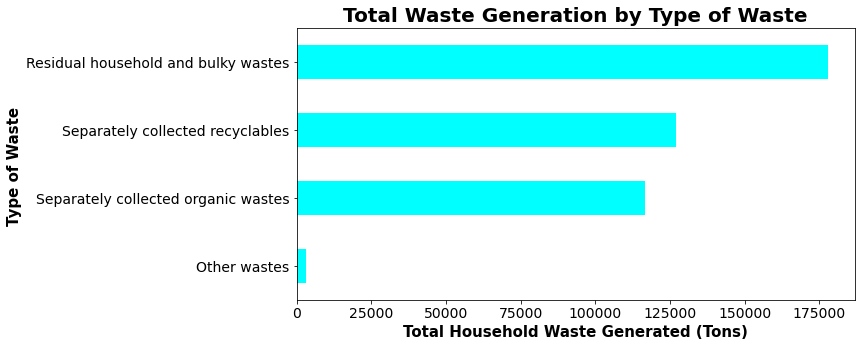

Total Waste Generation by Type of Waste :
Types of Waste
Residual household and bulky wastes    177854.5
Separately collected recyclables       126842.5
Separately collected organic wastes    116705.4
Other wastes                             3162.6
Name: Total Household Waste Generated (Tons), dtype: float64


In [20]:
# Total Waste Generation by Type of Waste
total_waste_by_type = df.groupby('Types of Waste')['Total Household Waste Generated (Tons)'].sum()
total_waste_by_type = total_waste_by_type.sort_values(ascending=True)
plt.figure(figsize=(10,5))
total_waste_by_type.plot(kind='barh', fontsize=14, color='cyan')
plt.xlabel('Total Household Waste Generated (Tons)', fontweight='bold', fontsize=15)
plt.ylabel('Type of Waste ', fontweight='bold', fontsize=15)
plt.title('Total Waste Generation by Type of Waste', fontweight='bold', fontsize=20)
plt.xticks(rotation=0)
plt.show()

print("Total Waste Generation by Type of Waste :")
print(total_waste_by_type[::-1])

**Residual household and bulky wastes has the highest share amongst all other types of waste i.e. 177854.5 (tons)**

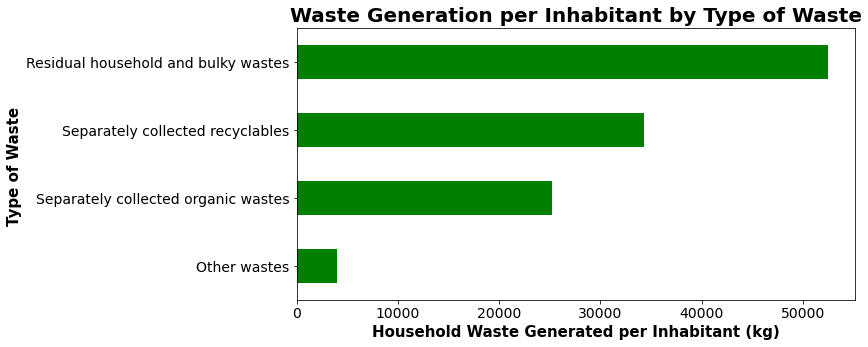

Waste Generation per Inhabitant by Type of Waste :
Types of Waste
Residual household and bulky wastes    52458.000000
Separately collected recyclables       34273.000000
Separately collected organic wastes    25190.000000
Other wastes                            3993.481283
Name: Household Waste Generated per Inhabitant (kg), dtype: float64


In [21]:
# Waste Generation per Inhabitant by Type of Waste
waste_per_inhabitant_by_type = df.groupby('Types of Waste')['Household Waste Generated per Inhabitant (kg)'].sum()
waste_per_inhabitant_by_type = waste_per_inhabitant_by_type.sort_values(ascending=True)
plt.figure(figsize=(10,5))
waste_per_inhabitant_by_type.plot(kind='barh', fontsize=14, color='green')
plt.xlabel('Household Waste Generated per Inhabitant (kg)', fontweight='bold', fontsize=15)
plt.ylabel('Type of Waste ', fontweight='bold', fontsize=15)
plt.title('Waste Generation per Inhabitant by Type of Waste', fontweight='bold', fontsize=20)
plt.xticks(rotation=0)
plt.show()

print("Waste Generation per Inhabitant by Type of Waste :")
print(waste_per_inhabitant_by_type[::-1])

**Residual household and bulky wastes has the highest share for Waste Generation per Inhabitant i.e. 52458.0 (kg)**

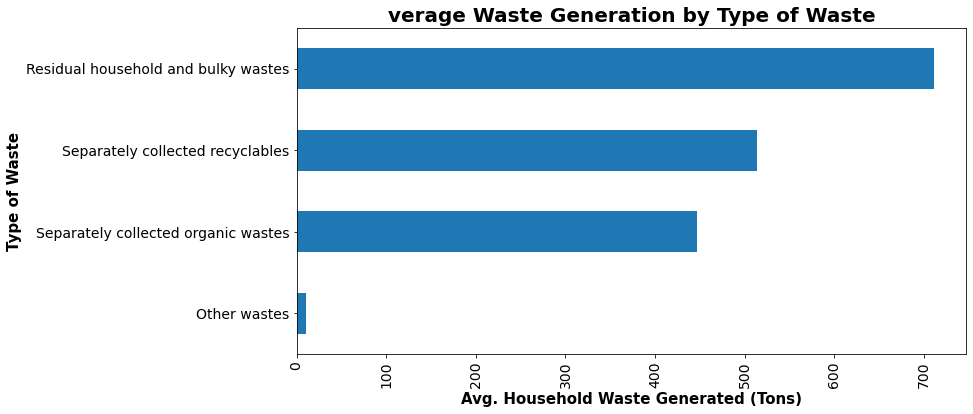


Average Waste Generation by Type of Waste:
Types of Waste
Residual household and bulky wastes    711.418000
Separately collected recyclables       513.532389
Separately collected organic wastes    447.147126
Other wastes                            10.981250
Name: Total Household Waste Generated (Tons), dtype: float64


In [22]:
# Average Waste Generation by Type of Waste 
avg_waste_by_type = df.groupby('Types of Waste')['Total Household Waste Generated (Tons)'].mean()
avg_waste_by_type = avg_waste_by_type.sort_values(ascending=True)
plt.figure(figsize=(12,6))
avg_waste_by_type.plot(kind='barh',  fontsize=14)
plt.xlabel('Avg. Household Waste Generated (Tons)', fontweight='bold', fontsize=15)
plt.ylabel('Type of Waste', fontweight='bold', fontsize=15)
plt.title('verage Waste Generation by Type of Waste', fontweight='bold', fontsize=20)
plt.xticks(rotation=90)
plt.show()

print("\nAverage Waste Generation by Type of Waste:")
print(avg_waste_by_type[::-1])

**Residual household and bulky wastes has the highest share for Average Waste Generation i.e. 711.41 (Tons)**

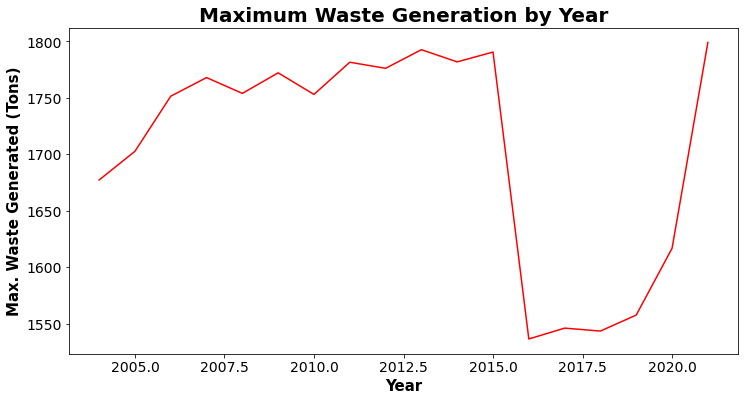


Maximum Waste Generation by Year :
Year
2004    1677.3
2005    1702.7
2006    1751.5
2007    1768.0
2008    1754.0
2009    1772.2
2010    1753.1
2011    1781.6
2012    1776.2
2013    1792.7
2014    1781.9
2015    1790.6
2016    1536.5
2017    1546.1
2018    1543.5
2019    1557.7
2020    1616.8
2021    1799.1
Name: Total Household Waste Generated (Tons), dtype: float64


In [23]:
# Maximum Waste Generation by Year
max_waste_by_year = df.groupby('Year')['Total Household Waste Generated (Tons)'].max()
plt.figure(figsize=(12,6))
max_waste_by_year.plot(kind='line', fontsize=14, color= 'r')
plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.ylabel('Max. Waste Generated (Tons)', fontweight='bold', fontsize=15)
plt.title('Maximum Waste Generation by Year', fontweight='bold', fontsize=20)
plt.xticks(rotation=0)
plt.show()

print("\nMaximum Waste Generation by Year :")
print(max_waste_by_year)

**Maximum Waste generation from 2016 to 2020 is considerably lower than other years**

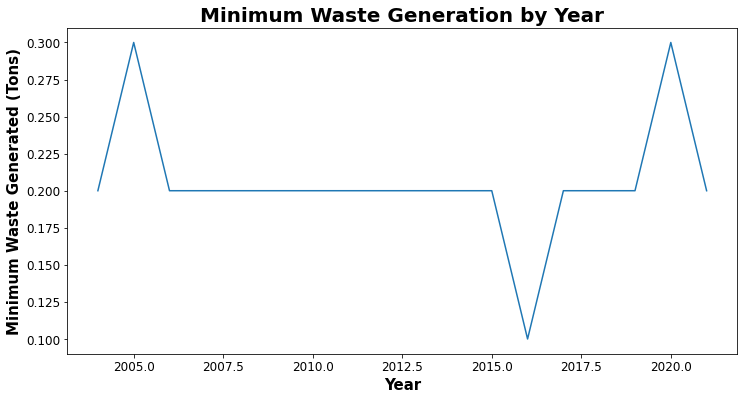

Minimum Waste Generation by Year :
Year
2004    0.2
2005    0.3
2006    0.2
2007    0.2
2008    0.2
2009    0.2
2010    0.2
2011    0.2
2012    0.2
2013    0.2
2014    0.2
2015    0.2
2016    0.1
2017    0.2
2018    0.2
2019    0.2
2020    0.3
2021    0.2
Name: Total Household Waste Generated (Tons), dtype: float64


In [24]:
# Minimum Waste Generation by Year
min_waste_by_year = df.groupby('Year')['Total Household Waste Generated (Tons)'].min()
plt.figure(figsize=(12,6))
min_waste_by_year.plot(kind='line', fontsize=12, title='')
plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.ylabel('Minimum Waste Generated (Tons)', fontweight='bold', fontsize=15)
plt.title('Minimum Waste Generation by Year', fontweight='bold', fontsize=20)
plt.xticks(rotation=0)
plt.show()

print("Minimum Waste Generation by Year :")
print(min_waste_by_year)

**Minimum Waste generation in 2016 is the lowest than other years**

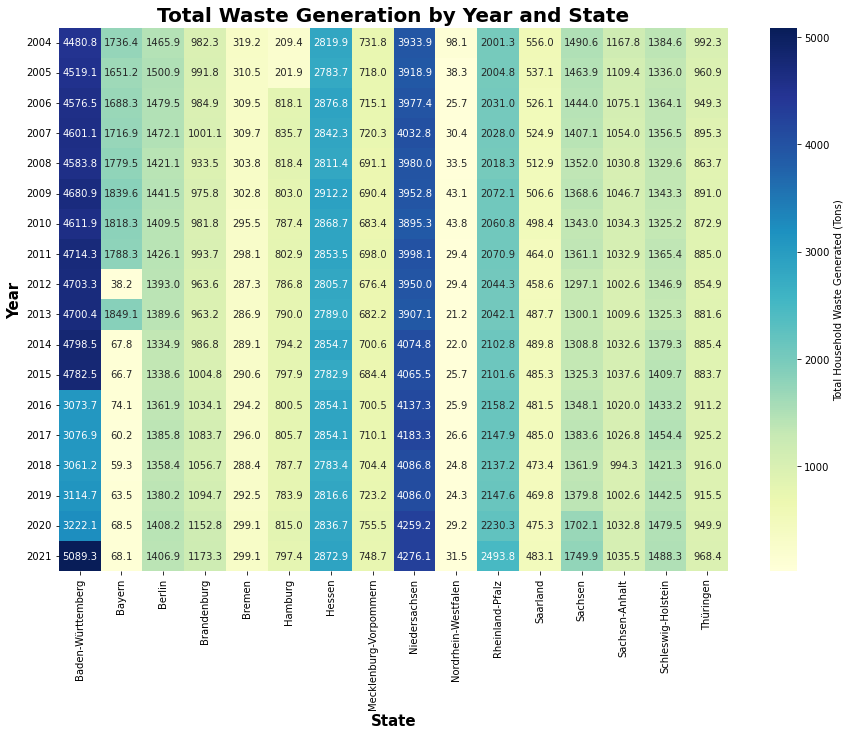

In [25]:
# Total Waste Generation by Year and State
total_waste_by_year_state = df.groupby(['Year', 'States'])['Total Household Waste Generated (Tons)'].sum()
total_waste_by_year_state_unstack = total_waste_by_year_state.unstack()
plt.figure(figsize=(15, 10))
sns.heatmap(total_waste_by_year_state_unstack, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Total Household Waste Generated (Tons)'})
plt.xlabel('State', fontweight='bold', fontsize=15)
plt.ylabel('Year', fontweight='bold', fontsize=15)
plt.title('Total Waste Generation by Year and State', fontweight='bold', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Baden-Württemberg state produces highest waste from 2004 to 2015 and in 2021 its the all time high**

**Niedersachsen state produces higher waste in almost every**

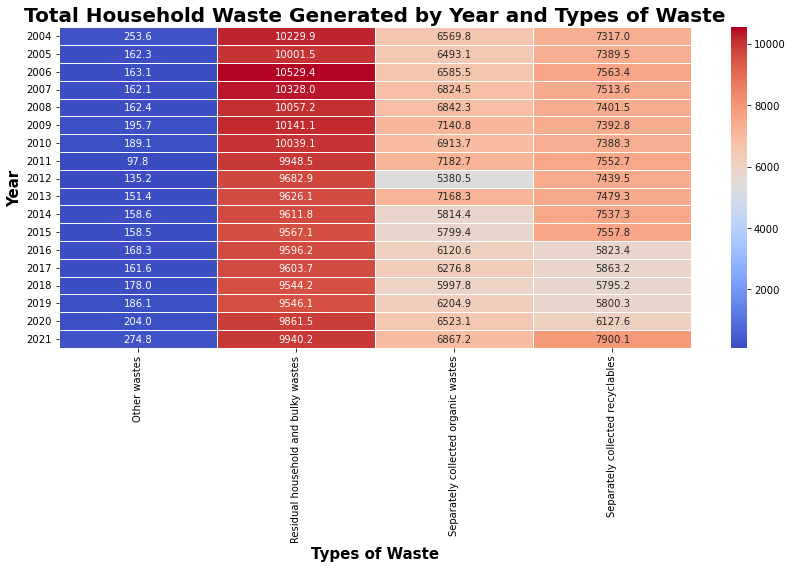

In [26]:
# Create a pivot table to aggregate Total Household Waste Generated (Tons)
pivot_df = df.pivot_table(index='Year', columns='Types of Waste', values='Total Household Waste Generated (Tons)', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Total Household Waste Generated by Year and Types of Waste', fontweight='bold', fontsize=20)
plt.xlabel('Types of Waste', fontweight='bold', fontsize=15)
plt.ylabel('Year', fontweight='bold', fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Every year (from 2004-2021) Residual household and bulky type of wastes has the highest share in waste generation.**

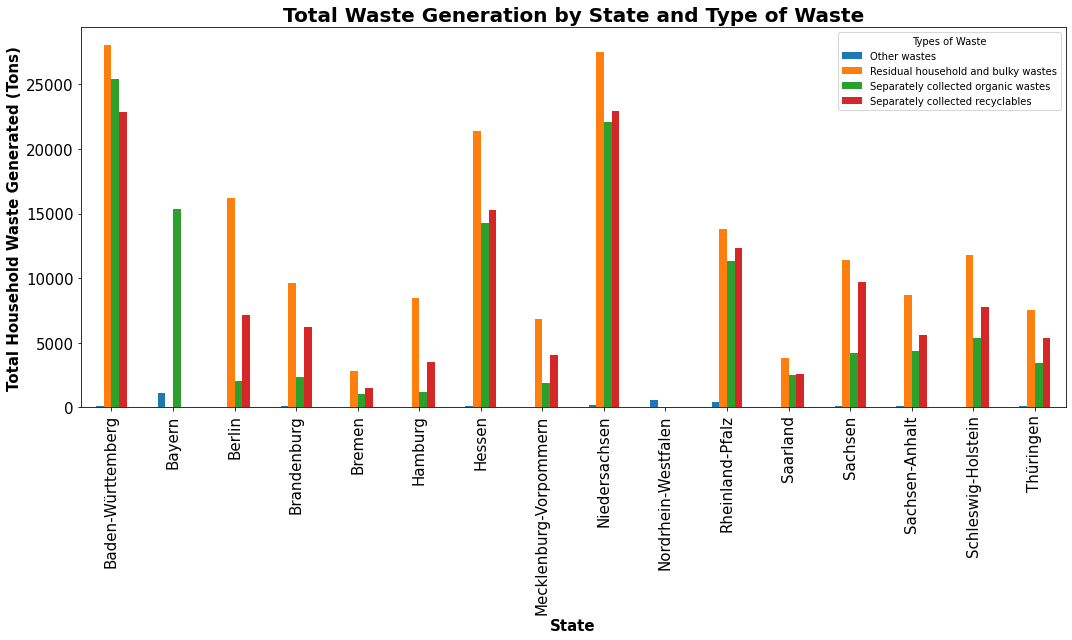


Total Waste Generation by State and Type of Waste:
States                  Types of Waste                     
Baden-Württemberg       Other wastes                             147.4
                        Residual household and bulky wastes    27995.2
                        Separately collected organic wastes    25403.8
                        Separately collected recyclables       22844.6
Bayern                  Other wastes                            1082.1
                        Separately collected organic wastes    15351.9
Berlin                  Other wastes                              36.7
                        Residual household and bulky wastes    16164.5
                        Separately collected organic wastes     2008.5
                        Separately collected recyclables        7164.4
Brandenburg             Other wastes                              84.3
                        Residual household and bulky wastes     9659.0
                        Separately c

In [27]:
# Total Waste Generation by State and Type of Waste
total_waste_by_state_type = df.groupby(['States', 'Types of Waste'])['Total Household Waste Generated (Tons)'].sum()
total_waste_by_state_type_unstack = df.groupby(['States', 'Types of Waste'])['Total Household Waste Generated (Tons)'].sum().unstack()
total_waste_by_state_type_unstack.plot(kind='bar',figsize=(15, 9) , fontsize=15)
plt.xlabel('State', fontweight='bold', fontsize=15)
plt.ylabel('Total Household Waste Generated (Tons)', fontweight='bold', fontsize=15)
plt.title('Total Waste Generation by State and Type of Waste', fontweight='bold', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("\nTotal Waste Generation by State and Type of Waste:", )
print(total_waste_by_state_type)

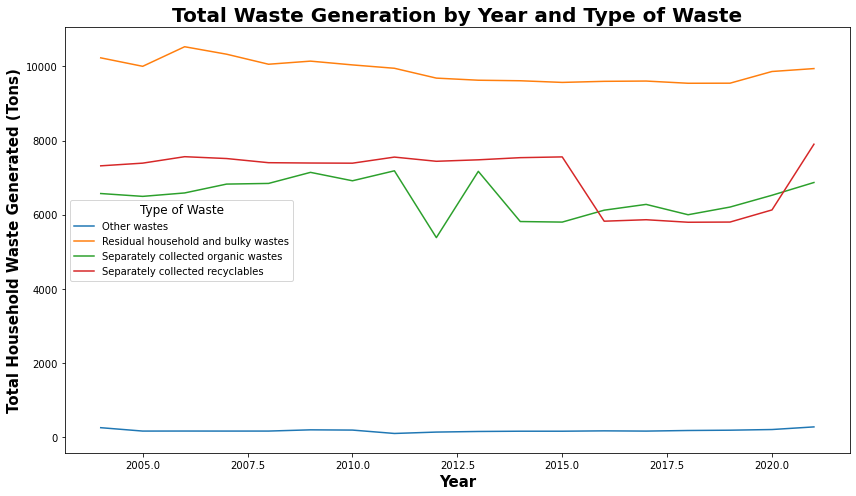


Total Waste Generation by Year and Type of Waste:
Year  Types of Waste                     
2004  Other wastes                             253.6
      Residual household and bulky wastes    10229.9
      Separately collected organic wastes     6569.8
      Separately collected recyclables        7317.0
2005  Other wastes                             162.3
                                              ...   
2020  Separately collected recyclables        6127.6
2021  Other wastes                             274.8
      Residual household and bulky wastes     9940.2
      Separately collected organic wastes     6867.2
      Separately collected recyclables        7900.1
Name: Total Household Waste Generated (Tons), Length: 72, dtype: float64


In [28]:
# Total Waste Generation by Year and Type of Waste
total_waste_by_year_type = df.groupby(['Year', 'Types of Waste'])['Total Household Waste Generated (Tons)'].sum()
total_waste_by_year_type_unstack = df.groupby(['Year', 'Types of Waste'])['Total Household Waste Generated (Tons)'].sum().unstack()
total_waste_by_year_type_unstack.plot(kind='line', figsize=(12, 7))
plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.ylabel('Total Household Waste Generated (Tons)', fontweight='bold', fontsize=15)
plt.title('Total Waste Generation by Year and Type of Waste', fontweight='bold', fontsize=20)
plt.legend(title='Type of Waste', title_fontsize='12')
plt.tight_layout()
plt.show()

print("\nTotal Waste Generation by Year and Type of Waste:" )
print(total_waste_by_year_type)

- **Over the years residual household and bulky waste generation is almost constant but it has the highest share.**
- **Seperately collected recycleble waste generation has gradulaly decreased from 2016 to 2020 it has the second highest share**
- **Separately collected Organic waste shows some ups and downs from 2011 to 2021**

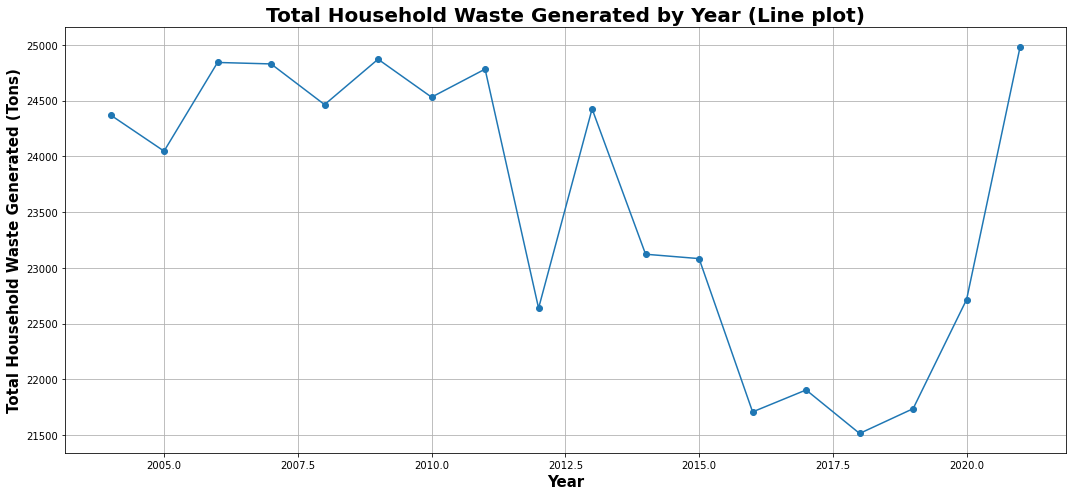

Total Household Waste Generated (Tons):
Year
2004    24370.3
2005    24046.4
2006    24841.4
2007    24828.2
2008    24463.4
2009    24870.4
2010    24530.2
2011    24781.7
2012    22638.1
2013    24425.1
2014    23122.1
2015    23082.8
2016    21708.5
2017    21905.3
2018    21515.2
2019    21737.4
2020    22716.2
2021    24982.3
Name: Total Household Waste Generated (Tons), dtype: float64


In [29]:
# Bar plot of 'Total Household Waste Generated (Tons) by Year'
total_waste_by_year = df.groupby('Year')['Total Household Waste Generated (Tons)'].sum()
# Create a line plot to visualize the trend over the years
plt.figure(figsize=(15, 7))
plt.plot(total_waste_by_year.index, total_waste_by_year.values, marker='o', linestyle='-')
plt.xlabel('Year', fontweight='bold', fontsize=15)
plt.ylabel('Total Household Waste Generated (Tons)', fontweight='bold', fontsize=15)
plt.title('Total Household Waste Generated by Year (Line plot)', fontweight='bold', fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

print("Total Household Waste Generated (Tons):", )
print(total_waste_by_year)

- **From 2011-2012 and 2015-2016 Total Household Waste Generation drops significantly**
- **From 2020 to 2021 there is sudden rise in Total Household Waste Generation.**

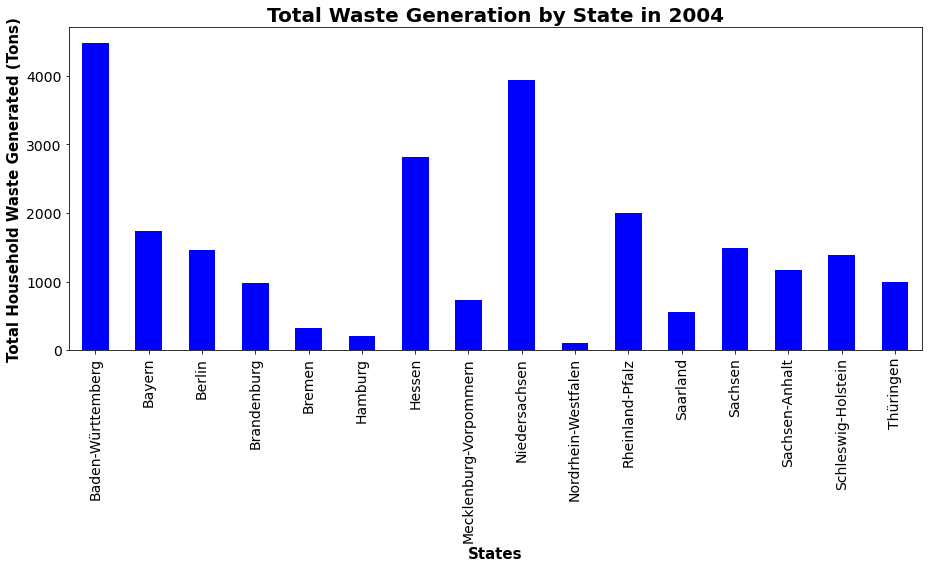

Total Household Waste Generated (Tons) for  2004
States
Baden-Württemberg         4480.8
Bayern                    1736.4
Berlin                    1465.9
Brandenburg                982.3
Bremen                     319.2
Hamburg                    209.4
Hessen                    2819.9
Mecklenburg-Vorpommern     731.8
Niedersachsen             3933.9
Nordrhein-Westfalen         98.1
Rheinland-Pfalz           2001.3
Saarland                   556.0
Sachsen                   1490.6
Sachsen-Anhalt            1167.8
Schleswig-Holstein        1384.6
Thüringen                  992.3
Name: Total Household Waste Generated (Tons), dtype: float64


In [30]:
# Choose a specific year (e.g., 2004)
specific_year = 2004

# Filter the data for the chosen year
data_for_year = df[df['Year'] == specific_year]

# Calculate the total waste generation by state for the chosen year
state_totals = data_for_year.groupby('States')['Total Household Waste Generated (Tons)'].sum()

# Create a bar plot
plt.figure(figsize=(13, 8))
state_totals.plot(kind='bar', fontsize=14, color='blue')
plt.xlabel('States', fontweight='bold', fontsize=15)
plt.ylabel('Total Household Waste Generated (Tons)', fontweight='bold', fontsize=15)
plt.title(f'Total Waste Generation by State in {specific_year}', fontweight='bold', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print('Total Household Waste Generated (Tons) for ',specific_year)
print(state_totals)

**In 2004 'Baden-Württemberg' and 'Niedersachsen' these 2 states generated highest waste**

<Figure size 432x432 with 0 Axes>

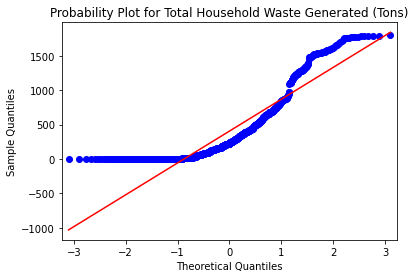

In [31]:
# Create a Probability Plot for 'Total Household Waste Generated (Tons)'
plt.figure(figsize=(6, 6))
sm.qqplot(df['Total Household Waste Generated (Tons)'], line='s')
plt.title('Probability Plot for Total Household Waste Generated (Tons)')
plt.show()

**This Probability Plot shows some initial data points 'near 0' are away from the reference line (red line). These could be outliers or errors in data collection.**

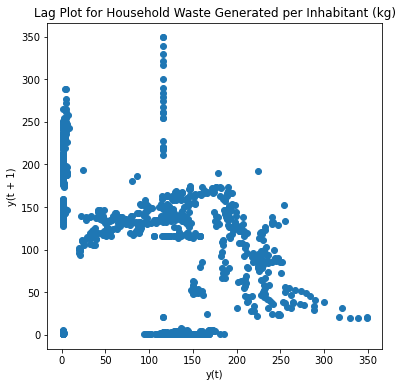

In [32]:
# Lag Plot for 'Household Waste Generated per Person (kg)'
plt.figure(figsize=(6, 6))
lag_plot(df['Household Waste Generated per Inhabitant (kg)'])
plt.title('Lag Plot for Household Waste Generated per Inhabitant (kg)')
plt.show()

**Note: A Lag Plot helps in identifying autocorrelation, which is the correlation between a data point and one or more lagged (previous) values of the same variable. In the context of time series data, autocorrelation indicates whether there is a pattern or trend that repeats over time. No such autocorrelation found for above fearure.**

## Conclusion:
    The dataset provides valuable insights into waste generation trends by year, state and type of waste. Key findings include the highest waste generation in 2021, the dominance of "Residual household and bulky wastes" in waste generation and variations in waste generation across states. These insights can be used for waste management.